In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data=pd.read_csv('car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.shape

(301, 9)

# Information

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Checking The Categorical

In [8]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding Cetagorical Data

In [10]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,2,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,2,1,0,0


In [13]:
x=car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [14]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          1            1             0   
1    2013           9.54       43000          2            1             0   
2    2017           9.85        6900          1            1             0   
3    2011           4.15        5200          1            1             0   
4    2014           6.87       42450          2            1             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          2            1             0   
297  2015           5.90       60000          1            1             0   
298  2009          11.00       87934          1            1             0   
299  2017          12.50        9000          2            1             0   
300  2016           5.90        5464          1            1             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [17]:
model=LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
train_data_prediction=model.predict(x_train)


In [21]:
error_score=metrics.r2_score(y_train,train_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8799451660493698


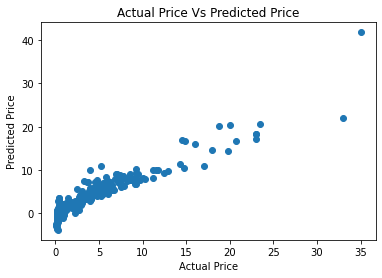

In [22]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [23]:
test_data_prediction=model.predict(x_test)
error_score_test=metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error : ",error_score_)

R Squared Error :  0.8365766715026945


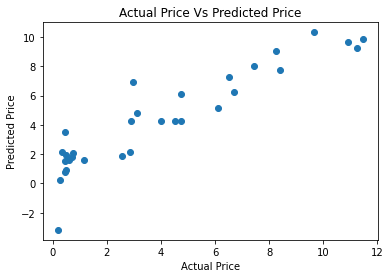

In [24]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

# Lasso Regression

In [25]:
model_1=Lasso()

In [26]:
model_1.fit(x_train,y_train)

Lasso()

In [27]:
train_data_prediction=model_1.predict(x_train)

In [28]:
error_score=metrics.r2_score(y_train,train_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8427856123435794


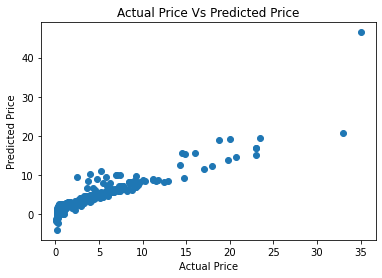

In [29]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [32]:
test_data_prediction=model_1.predict(x_test)
error_score_test=metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error : ",error_score_test)

R Squared Error :  0.8709167941173195


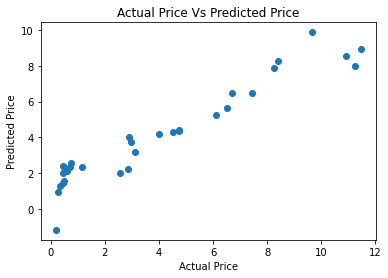

In [33]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()